# Détermination de coefficient conducto-convectif 

## Un peu de théorie 
### Système et hypothèses
Considérons le système $\{ \text{eau dans un bescher} \}$.
On suppose que l'eau est parfaitement agitée, la température de l'eau est donc homogène dans tout le récipient. On assimile pour la phase condensée aqueuse que les capacité calorifique volumique $c_{v,\mathrm{H_2 O}}$ et la capacité calorifique à pression constante $c_{p,\mathrm{H_2 O}}$ sont égales. 

$$ c_{p,\mathrm{H_2 O}} = c_{v,\mathrm{H_2 O}} \equiv c $$

On suppose également que le milieu extérieur est composé d'air à la température $T_{ext}$ et compose un thermostat, ainsi : 

$$ \frac{dT_{ext}}{dt} \approx 0 $$

Sur la gamme de température étudiée, on suppose qu'il n'y a pas de transition de phase et que, la capacité calorifique de l'eau ne dépend pas de la température. Il vient donc que 

$$ \frac{dc}{dT} \approx 0 $$

En prenant une solution parfaitement agitée, on néglige les effets de diffusion thermique dans la solution, le seul phénomène de transport viens de la **loi de Newton** sur le transport conducto-convectif. Cette loi stipule que la chaleur échangé à travers une surface $S$ entre deux milieux pendant une durée $dt$ vaut 

$$ \delta Q = - h\,S (T_f - T_{ext})dt ,$$

avec $S$ la surface d'échange du solide entre les deux milieux, $T_f$ la température du fluide considéré, et $h$ le coefficient du transport conducto-convectif. Le but de cette expérience va être donc, de déterminer la valeur de ce coefficient. 

### Application et calcul 
D'après le premier principe appliqué à notre système, il vient que : 
$$ dU = \delta Q \; \Leftrightarrow \; m_{\mathrm{H_2 O}} \, c \, dT_f =  - h\,S (T_f - T_{ext})dt$$

On a alors en recombinant : 

$$ \frac{dT_f}{T_f(t) - T_{ext}}  = - \; \frac{h\,S}{m_{\mathrm{H_2 O}} c} \, dt$$

Le changement de variable nous permet d'avoir en intégrant entre $t=0$ et $t$ : 

$$ \int_{T_f(t=0)}^{T_f(t)}  \frac{d\tilde{T_f}}{\tilde{T_f}(t) - T_{ext}} = \int_{t=0}^t - \; \frac{h\,S}{m_{\mathrm{H_2 O}} c} \, d\tilde{t}$$

Tout ceci nous donne une relation linéaire suivante : 

$$\ln\left( T_f(t) - T_{ext} \right) = \ln\left( T_f(t=0) - T_{ext} \right) - \frac{h\,S}{m_{\mathrm{H_2 O}} c} t$$

En récupérant ainsi la courbe de refroidissement d'une eau chauffé dans un bescher en fonction du temps, on obtient une droite de coefficient directeur $a$ et d'ordonnée à l'origine $b$, avec : 

$$ a \equiv - \frac{h\,S}{m_{\mathrm{H_2 O}} c} \quad \text{et} \quad b \equiv \ln\left( T_f(t=0) - T_{ext} \right) $$

## Dispositif expérimental 
### Matériel nécessaire
- Un bescher en verre de taille choisis
- Des morceaux de polystyrène adapté à la taille du bescher
- Un thermocouple muni d'un picolog pour acquérir la courbe de refroidissement
- Un agitateur magnétique
- Une bouilloir

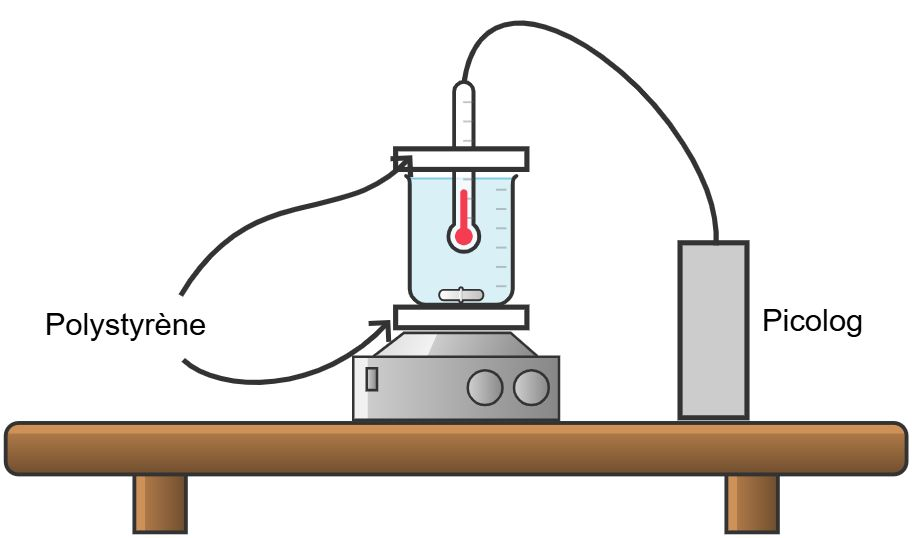


### Acquisition des données
Faire chauffer de l'eau dans une bouilloir, verser l'eau dans un bescher, placer le polystyrène au dessus et en dessous d'un bescher sous agitation et introduire dans la solution le thermocouple. 
Attendre un temps suffisamment long pour maximiser le nombre de point.
On prendra soin de relever la hauteur d'eau dans le bescher si celui-ci n'est pas remplie entièrement, de plus il est nécessaire de relever la masse d'eau introduite dans ce dernier. Dans le cas de cette expérience, on a $m_{\mathrm{H_2 O}} = 152.4 g$

Ici l'expérience avait une durée de 20 minutes, avec une période d'échantillonage $T_e = 2 \;s$. 

Le bescher utilisé avait un rayon $r = 54.15 \, mm$ et une hauteur $l = 95.34 \, mm$. La surface d'échange du bescher vaut donc : 

$$ S = 2 \pi r l = \boxed{3.24 \, 10^{-2} \;m^2 }$$

Pour une modélisation du type ln(Tf-Text) = a*t + b :
a = (-0.00039 ± 0.000000) s^-1
b = (4.19072 ± 0.00001)
h = (7.57647) J/K/m^2/s

ln(Tf(0)-Text) - b =0.017


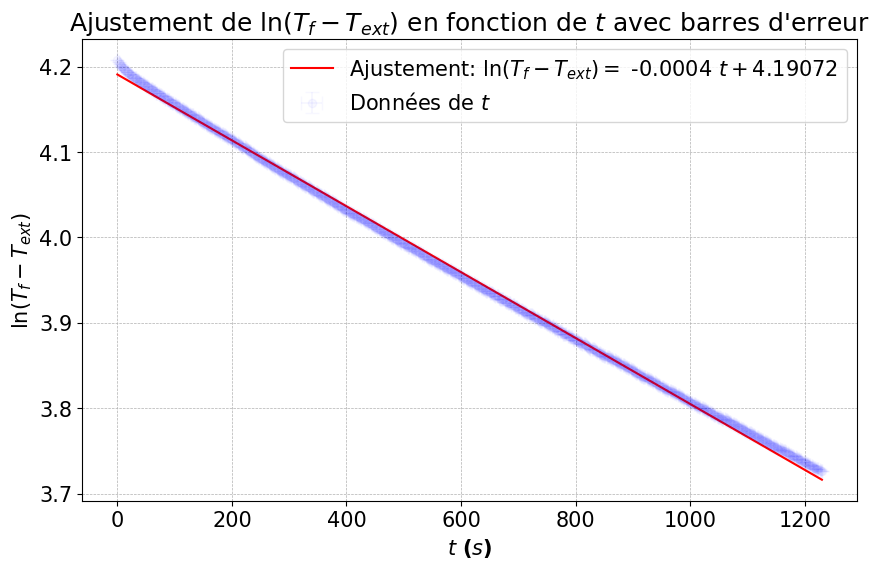

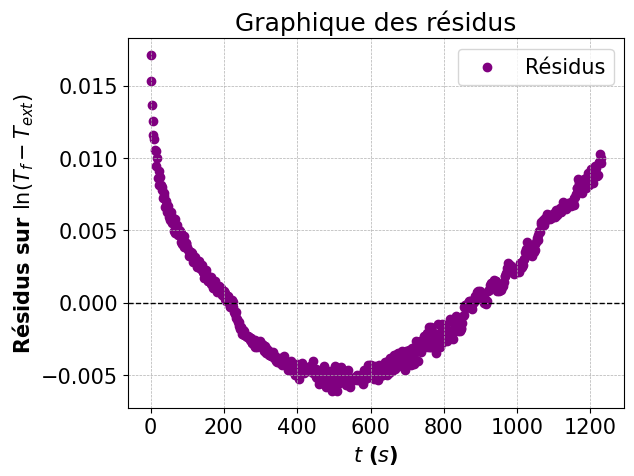

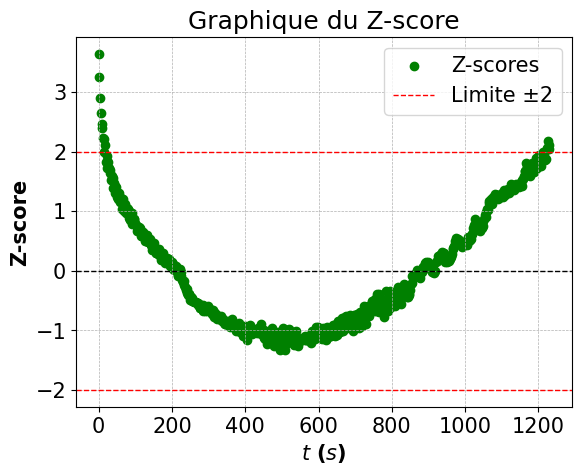

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 10 15:48:24 2025

@author: natha
"""

notation = [r'$C_x$']

rho = 1.204 #kg/m^3 à 20°C

F_0 = 0.02 #N Force à vide qu'on retire

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats  # Import pour la génération d'incertitudes
import pandas as pd  # Import pour la lecture du fichier CSV

plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelweight'] = 'bold'

fichier = "caca.csv"  # Chemin vers le fichier CSV

# Lecture du fichier CSV
data = pd.read_csv(fichier, header=None, names=['t', 'Tf'])

# Extraction des données
Tf = data['Tf'].values
t = data['t'].values
# Tex = np.array([])  # Tableau vide pour Tex
r = 54.15e-3
hauteur = 95.34e-3
c = 4.18e3
m=152.4e-3

S = 2*np.pi * r * hauteur  #m^2

Text = np.mean(23.4)

deltaT = Tf - Text

lnT = np.log(deltaT)

# Génération des incertitudes sur T avec une distribution gaussienne
sig_i = 0.01

# Génération des incertitudes sur v (x_i) avec une distribution gaussienne
sig_ix = 0

#génération incertitude sur ln(deltaT)
ulnT = sig_i / deltaT

# Modèle de la fonction
def model(t, a, b):
    return a * t + b

# Ajustement du modèle
params1, cov_matrix1 = curve_fit(model, t, lnT, sigma=ulnT, absolute_sigma=True)
a1, b1 = params1
errors1 = np.sqrt(np.diag(cov_matrix1))

h = -m*c/S*a1

# Calcul des valeurs ajustées
lnT_fit1 = model(t, a1, b1)

# Calcul des résidus
residuals1 = lnT - lnT_fit1

# Calcul du Z-score
residuals_mean1 = np.mean(residuals1)
residuals_std1 = np.std(residuals1)
z_scores1 = (residuals1 - residuals_mean1) / residuals_std1

# Affichage des résultats
print("""Pour une modélisation du type ln(Tf-Text) = a*t + b :""")
print(f"a = ({a1:.5f} ± {errors1[0]:.6f}) s^-1")
print(f"b = ({b1:.5f} ± {errors1[1]:.5f})")
print(f"h = ({h:.5f}) J/K/m^2/s")
ordo = np.log(Tf[0] - Text)
print("""""""""""")
print(f"ln(Tf(0)-Text) - b ={ordo - b1:.3f}")

# Courbe ajustée
t_fit1 = np.linspace(min(t), max(t), 500)
lnT_fit_line1 = model(t_fit1, a1, b1)

# Tracé des données avec barres d'erreur
plt.figure(figsize=(10, 6))
plt.errorbar(t, lnT, yerr=ulnT, xerr=sig_ix, fmt='o', label=r'Données de $t$', color='blue',alpha=0.03, capsize=5)
plt.plot(t_fit1, lnT_fit_line1, label="Ajustement:" r" $\ln(T_f-T_{ext})=$"f" {a1:.4f}" r" $t + $"f"{b1:.5f}", color='red')
plt.xlabel(r"$t$ ($s$)")
plt.ylabel(r"$\ln(T_f-T_{ext})$")
plt.legend(fontsize=15)
plt.title(r"Ajustement de $\ln(T_f-T_{ext})$ en fonction de $t$ avec barres d'erreur")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

# Graphique des résidus
plt.scatter(t, residuals1, color='purple', label='Résidus')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel(r"$t$ ($s$)")
plt.ylabel(r"Résidus sur $\ln(T_f-T_{ext})$")
plt.title("Graphique des résidus")
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

# Graphique du Z-score
plt.scatter(t, z_scores1, color='green', label='Z-scores')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axhline(2, color='red', linestyle='--', linewidth=1, label='Limite ±2')
plt.axhline(-2, color='red', linestyle='--', linewidth=1)
plt.xlabel(r"$t$ ($s$)")
plt.ylabel("Z-score")
plt.title("Graphique du Z-score")
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()


## Critique sur la manipulation
Après traitement des données, on obtient un coefficient de conducto-convection de l'ordre de $7.58 \; W.K^{-1}.m^{-2}$ ce qui rentre dans l'ordre de grandeur attendu de $ 10 \; W.K^{-1}.m^{-2}$. On a donc 

$$ \boxed{h = 7.58 \; W.K^{-1}.m^{-2}} $$

De plus, l'ordonnée à l'origine at tendu est connu, elle doit avoir la valeur de $\ln\left( T_f(t=0) - T_{ext} \right) = 4.21$ or ici, on trouve une ordonnée à l'origine de $b = 4.19$ cela conforte le fait que l'expérience est satisfaisante. 

Cependant, nous avons supposée que les échanges n'étaient que sur la partie latéral du bescher, il a été constaté que les polystyrènes étaient chaud, des échanges on donc eu lieu. On peut constater sur les résidus une certaine tendance, en effet, la décroissance de température est plus importante au début de l'expérience. Cette décroissance plus importante peut être expliquer par la vaporisation de l'eau à haute température, en effet la première température relevée était de 90°C, à cette température la vaporisation de l'eau ne peut être négligeable.Ce phénomène étant endothermique, la décroissance de température est plus importante. 